1. Build a machine learning model to predict profit of the company based on
different expenses for a given dataset


## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [2]:
dataset=pd.read_csv("50_Startups.csv")

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.shape

(50, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Data preprocessing

## Data cleaning

### Checking for null values

In [7]:
dataset.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Checking for duplicates

In [8]:
dataset.duplicated().sum()

0

### Checking for outlier

<AxesSubplot:>

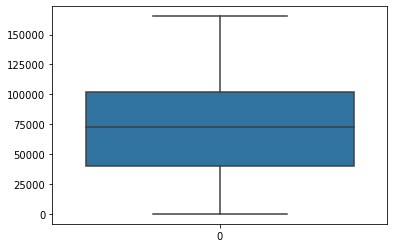

In [9]:
sns.boxplot(data=dataset['R&D Spend'])

<AxesSubplot:>

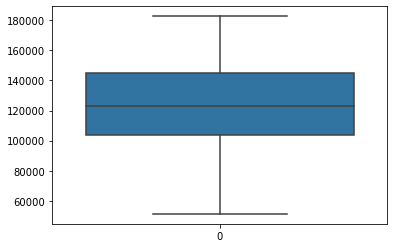

In [10]:
sns.boxplot(data=dataset['Administration'])

<AxesSubplot:>

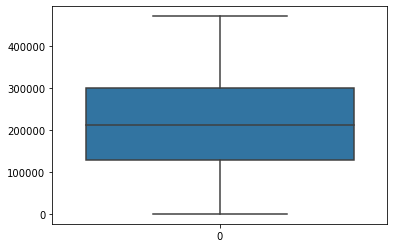

In [11]:
sns.boxplot(data=dataset['Marketing Spend'])

In [12]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [13]:
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [14]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

## Data encoding

In [15]:
catgorical_col=list(x.select_dtypes(include='object'))
catgorical_col

['State']

In [16]:
x=pd.get_dummies(x,columns=catgorical_col)

In [17]:
x

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [18]:
y=y.values
y=y.reshape(-1,1)

## Data train test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((37, 6), (13, 6), (37, 1), (13, 1))

## Feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc1=StandardScaler()
sc2=StandardScaler()
x_train=sc1.fit_transform(x_train)
y_train=sc2.fit_transform(y_train)
x_test=sc1.transform(x_test)
y_test=sc2.transform(y_test)

In [24]:
x_train

array([[-0.550107  ,  1.29442491,  0.05666864,  1.14564392, -0.52522573,
        -0.73598007],
       [ 0.39903705, -0.39835003,  0.71462482, -0.87287156,  1.90394328,
        -0.73598007],
       [ 1.20631929,  0.82127321,  0.94111173, -0.87287156,  1.90394328,
        -0.73598007],
       [ 0.98946994,  1.24982818,  0.41422869, -0.87287156,  1.90394328,
        -0.73598007],
       [-1.50140282, -0.01025342, -1.57718564, -0.87287156, -0.52522573,
         1.35873244],
       [-1.5109979 , -2.8268645 , -1.59207715, -0.87287156, -0.52522573,
         1.35873244],
       [-0.14845692,  1.11308716, -0.75409847, -0.87287156, -0.52522573,
         1.35873244],
       [ 0.8759735 , -0.07000876,  0.45539547, -0.87287156, -0.52522573,
         1.35873244],
       [-0.22407752, -0.34134517, -0.8792977 , -0.87287156,  1.90394328,
        -0.73598007],
       [-0.19445795,  0.18682681, -1.23162316,  1.14564392, -0.52522573,
        -0.73598007],
       [ 0.11138036, -0.10965726,  0.47549529,  1.

In [25]:
x_test

array([[-0.13911607,  2.26499766, -0.66798559, -0.87287156,  1.90394328,
        -0.73598007],
       [ 0.58589594, -1.26909222,  0.36129015,  1.14564392, -0.52522573,
        -0.73598007],
       [ 0.61188715, -0.53767077,  0.20029632, -0.87287156,  1.90394328,
        -0.73598007],
       [-0.93822328, -1.54448493, -0.30567588, -0.87287156,  1.90394328,
        -0.73598007],
       [ 1.69098177, -0.90520232,  1.59856702, -0.87287156,  1.90394328,
        -0.73598007],
       [-0.01229126,  0.13411747,  1.17033631, -0.87287156, -0.52522573,
         1.35873244],
       [-1.09870669, -2.27432478, -0.14303336, -0.87287156, -0.52522573,
         1.35873244],
       [-0.24204762,  1.10024533, -0.90208169, -0.87287156, -0.52522573,
         1.35873244],
       [ 0.02722495, -0.06355517,  0.78032266, -0.87287156,  1.90394328,
        -0.73598007],
       [ 1.45362461, -1.28460636,  1.27189493, -0.87287156,  1.90394328,
        -0.73598007],
       [-0.36020988, -0.83083138,  0.08668068, -0.

## Model building

In [26]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
y_train_pred=lr.predict(x_train)

In [30]:
R2_score=r2_score(y_train,y_train_pred)
R2_score

0.9511705268907698

In [31]:
y_test_pred=lr.predict(x_test)

In [32]:
R2_score=r2_score(y_test,y_test_pred)
R2_score

0.931581519915206

In [33]:
Mean_Squared_Error=mean_squared_error(y_test,y_test_pred)
Mean_Squared_Error

0.04192863280090605

In [34]:
MeanAbsoluteError=mean_absolute_error(y_test,y_test_pred)
MeanAbsoluteError

0.1674239779636455